In [115]:
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv("Speed_Dataset.csv")
df.columns

Index(['latitude', 'longitude', 'timestamp', 'speed_mph', 'speedlimit_mph',
       'functionalClass', 'controlledAccess', 'isHighway', 'state',
       'vehicle_id', 'driver_id'],
      dtype='object')

In [117]:
df.head()

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
1,34.643730,-77.939400,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693
2,34.551254,-78.784630,6/1/2015 0:04,1,55,4,N,1,NC,1262441,916461
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,1145487
4,35.614525,-78.474670,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,1145487


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343628 entries, 0 to 343627
Data columns (total 11 columns):
latitude            343628 non-null float64
longitude           343628 non-null float64
timestamp           343628 non-null object
speed_mph           343628 non-null int64
speedlimit_mph      343628 non-null int64
functionalClass     343628 non-null int64
controlledAccess    343628 non-null object
isHighway           343628 non-null int64
state               343628 non-null object
vehicle_id          343628 non-null int64
driver_id           343628 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 28.8+ MB


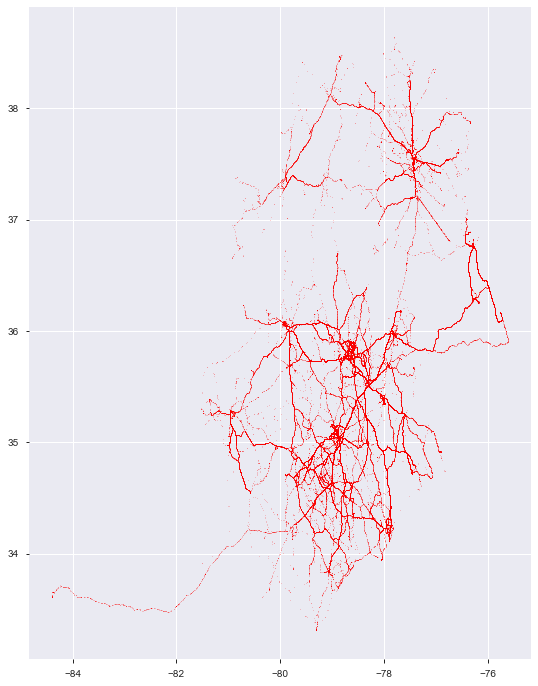

In [119]:
fig, axes = plt.subplots(figsize=(9,12))
axes.scatter(df.longitude, df.latitude, s=0.1, alpha=0.5, c='r')
plt.show()

In [150]:
from IPython.display import Image
map_img = Image("capture.png")

In [127]:
lat_max = df.latitude.max()
lat_min = df.latitude.min()
print("Range of latitude:", lat_max, lat_min)

lon_max = df.longitude.max()
lon_min = df.longitude.min()
print("Range of longitude:", lon_max, lon_min)

Range of latitude: 38.641785 33.31876
Range of longitude: -75.59966999999999 -84.402771


In [137]:
lon_mean = df.longitude.mean()
lat_mean = df.latitude.mean()
print("Mean lon:", lon_mean)
print("Mean lat:", lat_mean)

Mean lon: -78.49553687959877
Mean lat: 35.50474243911759


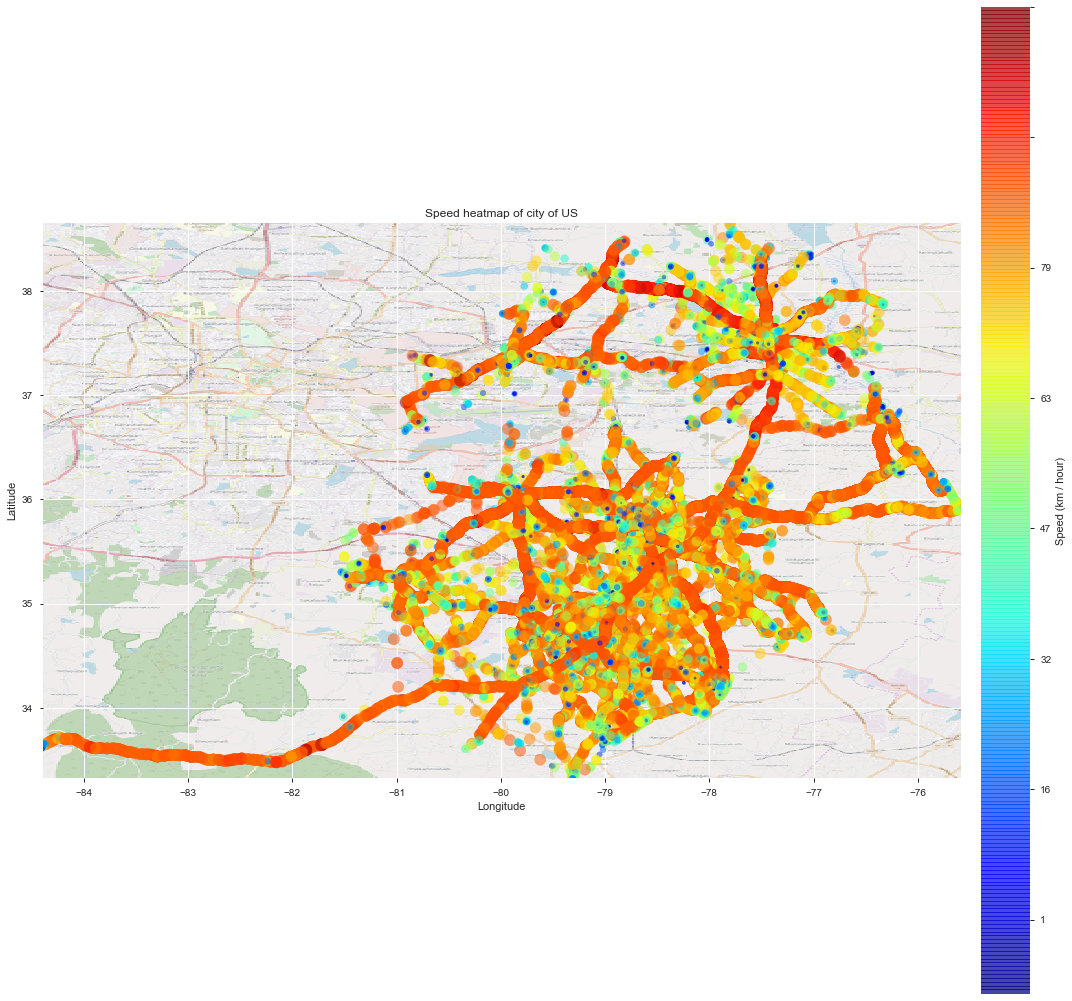

In [153]:
# Map needs to be updated


map_img = 'https://lh3.googleusercontent.com/np8igtYRrHpe7rvJwMzVhbyUZC4Npgx5fRznofRoLVhP6zcdBW9tfD5bC4FbF2ITctElCtBrOn7VH_qEBZMVoPrTFipBdodufT0QU1NeeQVyokMAKtvSHS9BfYMswXodz_IrkiZStg=w500-h664-no'
us_map = plt.imread(map_img)
cmap = plt.get_cmap("jet")

axes = df.plot(figsize=(15,20), kind='scatter', 
                    x='longitude', y='latitude', 
                    alpha=0.5, marker="o", s=df["speed_mph"]*2,
                    c=df["speed_mph"], cmap=cmap,
                    colorbar=False)

epsilon = 0.01
bound_box = [lon_min + epsilon, lon_max + epsilon, 
             lat_min + epsilon, lat_max + epsilon]
im = plt.imshow(us_map, extent=bound_box, zorder=0, 
           cmap=cmap, interpolation='nearest', alpha=0.7)

axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.set_title('Speed heatmap of city of US')

# Colorbar
speed = df["speed_mph"].values
tick_values = np.linspace(speed.min(), speed.max(), num=6, dtype=np.int64)

cbar = plt.colorbar(im, fraction=0.05, pad=0.02)
cbar.set_label("Speed (km / hour)")
cbar.ax.set_yticklabels(["%d"%(val) for val in tick_values])

plt.tight_layout()

#output_image = os.path.join(input_data_dir, "output_us_map_traffic")
#plt.savefig(output_image + ".png", format='png', dpi=300)

plt.show()

In [96]:
#How much speed are the drivers voilating
df['Overspeed'] = (df['speed_mph'] - df['speedlimit_mph'])#.clip(lower = 0)

In [97]:
#converting objects
df.latitude = df.latitude.astype(str)
df.longitude = df.longitude.astype(str)
df.functionalClass = df.functionalClass.astype(str)
df.isHighway = df.isHighway.astype(str)
df.vehicle_id = df.vehicle_id.astype(str)
df.driver_id = df.driver_id.astype(str)

In [12]:
import pandas_profiling
df.profile_report(style={'full_width':True})

In [13]:
profile = df.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

In [15]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

In [17]:
df=df.drop_duplicates()

In [18]:
df.describe()

,speed_mph,speedlimit_mph,Overspeed
count,343618.000000,343618.000000,343618.000000
mean,38.176912,54.442419,1.021329
std,24.945705,10.014947,2.528029
min,1.000000,20.000000,0.000000
25%,10.000000,45.000000,0.000000
50%,44.000000,55.000000,0.000000
75%,64.000000,65.000000,0.000000
max,79.000000,70.000000,27.000000


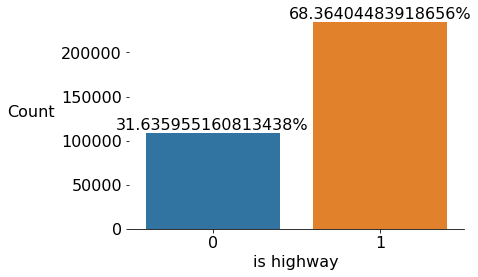

In [6]:
#to find the number of Highways

plt.figure(figsize=(6,4))
fig = sns.countplot(df.isHighway)
sns.despine(left=True)
fig.set_xlabel('is highway', fontsize=16)
plt.xticks(fontsize=16)
fig.set_ylabel('Count', fontsize=16, rotation=0)
fig.yaxis.labelpad = 30
plt.yticks(fontsize=16)
#Annot
for p in fig.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    fig.annotate('{:}%'.format(p.get_height()*100/len(df)), (x.mean(), y-150), ha='center', va='bottom', fontsize=16, color='black')
plt.show()

#### 68 percentage of roads are highways

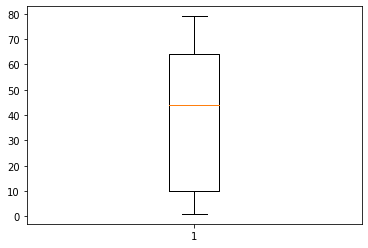

In [9]:
plt.boxplot(df['speed_mph']) 
plt.show()

In [21]:
df[df.state == 'NC'].groupby('driver_id').filter(lambda g: len(g) > 1000).groupby('type').size().sort_values(ascending=False)

In [98]:
# CHECK FOR VIOLATIONS

violators=(df.driver_id[df.Overspeed <0]).unique()


In [99]:
len(violators)

83

### This means all the drivers have voilated speed atleast once

In [100]:
neg_count = len(list(filter(lambda x: (x < 0), df.Overspeed)))
pos_count = len(list(filter(lambda x: (x >= 0), df.Overspeed)))
print("Number of Violations: ", neg_count) 
print("Number of correct observance: ", pos_count)

Number of Voilations:  256378
Number of correct observance:  87250


In [101]:
count_series = df.groupby(['driver_id']).size()
print("Maximum occurance of Driverid: ", count_series.max())

Maximum occurance of Driverid:  20664


This Maximum occurance is from Driver ID '0' which could indicate the possible missing value

In [102]:
df.head(20)

,latitude,longitude,timestamp,speed_mph,speedlimit_mph,functionalClass,controlledAccess,isHighway,state,vehicle_id,driver_id,Overspeed
0,34.640141,-77.938721,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693,-6
1,34.64373,-77.9394,6/1/2015 0:04,64,70,2,Y,1,NC,1208979,5693,-6
2,34.551254,-78.78463,6/1/2015 0:04,1,55,4,N,1,NC,1262441,916461,-54
3,35.613663,-78.470596,6/1/2015 0:06,62,70,2,Y,1,NC,1280223,1145487,-8
4,35.614525,-78.47466999999999,6/1/2015 0:06,61,70,2,Y,1,NC,1280223,1145487,-9
5,34.860115,-77.999969,6/1/2015 0:19,64,70,2,Y,1,NC,1208979,5693,-6
6,34.328571000000004,-78.926056,6/1/2015 0:24,23,55,4,N,1,NC,550280,500201,-32
7,35.756538,-78.699715,6/1/2015 0:30,3,55,5,N,1,NC,1280223,1145487,-52
8,34.402813,-78.916901,6/1/2015 0:33,65,70,2,N,1,NC,550280,500201,-5
9,35.039543,-78.149475,6/1/2015 0:34,64,70,2,Y,1,NC,1208979,5693,-6


## Best vs worst drivers

In [111]:
df2 = df
df2['Overspeed'] = (df2['speed_mph'] - df2['speedlimit_mph']).clip(lower = 0)
driver = df2.groupby(['driver_id']).sum()
driver.sort_values(['Overspeed','speed_mph'], ascending=False).head()

,speed_mph,speedlimit_mph,Overspeed
driver_id,,,
991329,317365,465695,19247
40450,277641,378160,19238
40451,223863,295290,16633
322085,293792,400350,14130
54397,440483,565180,13467


### This shows the driver with ID 991329 has violated speed limits to the maximum and can be treated as a bad driver

In [154]:
df2 = df
df2['Overspeed'] = (df2['speed_mph'] - df2['speedlimit_mph']).clip(upper = 0)
driver = df2.groupby(['driver_id']).sum()
driver.sort_values(['Overspeed','speed_mph'], ascending=True).head()

,latitude,longitude,speed_mph,speedlimit_mph,functionalClass,isHighway,vehicle_id,Overspeed
driver_id,,,,,,,,
0,743395.717953,-1.625781e+06,373294,1031215,81443,9015,17564145444,-664797
991329,315032.921902,-6.579064e+05,317365,465695,28947,7065,5168793035,-167577
54397,343791.244030,-7.729910e+05,440483,565180,29303,7598,5397086031,-138164
5687,260268.397309,-5.766500e+05,283240,409500,22037,5322,4052518246,-131173
39251,221024.056560,-4.885086e+05,223188,341895,19122,4219,7318370730,-121942


 Driver '0' has been observed to drive slowly in comparison with the speed limit and he/she could be treated as a very slow driver

In [114]:
driver.sort_values(['Overspeed','speed_mph'], ascending=False).head()

,speed_mph,speedlimit_mph,Overspeed
driver_id,,,
1308317,140,210,-70
295715,200,310,-110
11914,200,620,-422
1393454,1953,2460,-585
1381750,4005,5485,-1513


### Driver with id '1308317' seems to have closest adherence to speed limit and is regarded as best driver

In [ ]:
#How much speed are the drivers voilating
df['Overspeed'] = (df['speed_mph'] - df['speedlimit_mph'])#.clip(lower = 0)

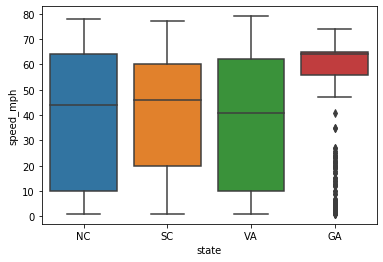

In [10]:
df1 = df[df.state.isin(df.state.value_counts().index)]

sns.boxplot(
    x='state',
    y='speed_mph',
    data=df1
)

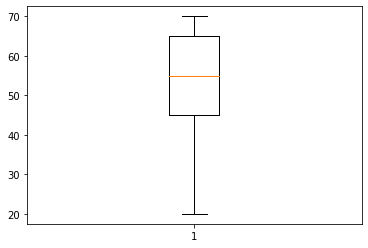

In [11]:
plt.boxplot(df['speedlimit_mph']) 
plt.show()

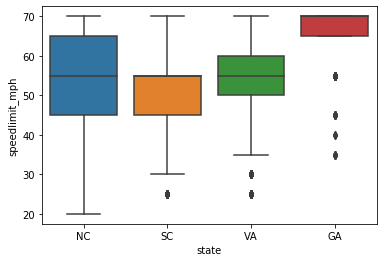

In [12]:
df1 = df[df.state.isin(df.state.value_counts().index)]

sns.boxplot(
    x='state',
    y='speedlimit_mph',
    data=df1
)

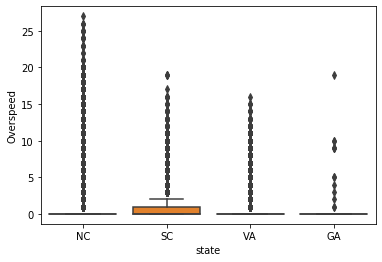

In [13]:
df1 = df[df.Overspeed.isin(df.Overspeed.value_counts().index)]

sns.boxplot(
    x='state',
    y='Overspeed',
    data=df1
)

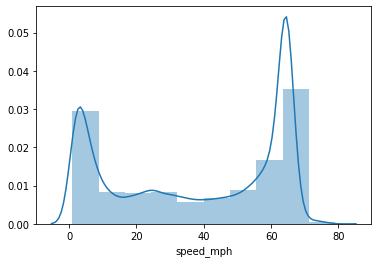

In [28]:
sns.distplot(df['speed_mph'], bins=10)


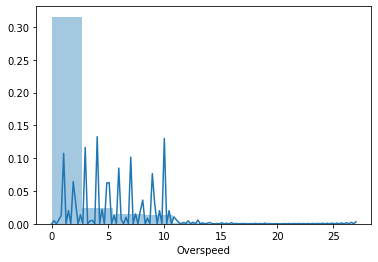

In [8]:
sns.distplot(df['Overspeed'], bins=10)
